## Bio-Inspired  Optimization for Hyperparameter Tuning (BACO-HT) in Compressive Strength Prediction

In [2]:
# Importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from scipy import stats

from pyswarm import pso

In [3]:
import pandas as pd

# Load the dataset
file_path = "litconcdata.csv"
df = pd.read_csv(file_path)

# Display basic information and check for missing values
df_info = df.info()
missing_values = df.isnull().sum()

df_info, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3745 entries, 0 to 3744
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                3745 non-null   float64
 1   Blast Furnance Slag   3745 non-null   float64
 2   Fly Ash               3745 non-null   float64
 3   Water                 3745 non-null   float64
 4   Limestone Powder      3745 non-null   float64
 5   Silica Fume           3745 non-null   float64
 6   Quartz Powder         3745 non-null   float64
 7   Superplasticizer      3745 non-null   float64
 8   Coarse Aggregate      3745 non-null   float64
 9   Fiber                 3745 non-null   float64
 10  Nano-Silica           3745 non-null   float64
 11  Fine Aggregate        3745 non-null   float64
 12  Age                   3745 non-null   int64  
 13  Compressive Strength  3745 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 409.7 KB


(None,
 Cement                  0
 Blast Furnance Slag     0
 Fly Ash                 0
 Water                   0
 Limestone Powder        0
 Silica Fume             0
 Quartz Powder           0
 Superplasticizer        0
 Coarse Aggregate        0
 Fiber                   0
 Nano-Silica             0
 Fine Aggregate          0
 Age                     0
 Compressive Strength    0
 dtype: int64)

In [4]:
# Check for duplicate rows
df.duplicated().sum()

97

In [5]:
# Drop duplicate rows
df = df.drop_duplicates()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop(columns=["Compressive Strength"])
y = df["Compressive Strength"]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Output shapes of train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2918, 13), (730, 13), (2918,), (730,))

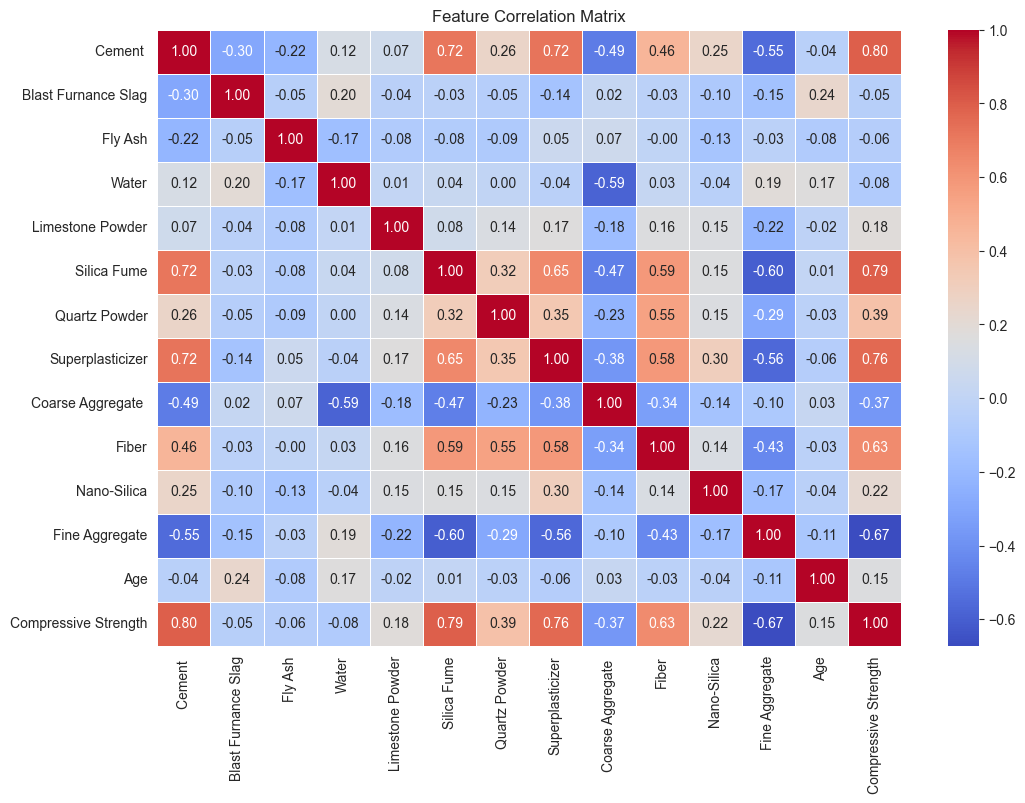

[]

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()

# Set a threshold for high correlation (e.g., above 0.85)
threshold = 0.85
highly_correlated_features = np.where(np.abs(correlation_matrix) > threshold)
highly_correlated_features = [(correlation_matrix.index[x], correlation_matrix.columns[y]) 
                              for x, y in zip(*highly_correlated_features) if x != y]

# Plot heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Output the highly correlated feature pairs
highly_correlated_features


In [8]:
X = df.drop(columns=["Compressive Strength"])
Y = df["Compressive Strength"]

# Split data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Output shapes of train and test sets
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((2918, 13), (730, 13), (2918,), (730,))

In [9]:
# Feature Importance Plot
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Most important feature at top
plt.show()

NameError: name 'model' is not defined

Training Set Metrics:
R2 score: 0.9968
MAE: 1.4627
RMSE: 2.3380

Test Set Metrics:
R2 score: 0.9825
MAE: 3.3925
RMSE: 5.6313
Accuracy: 92.59%


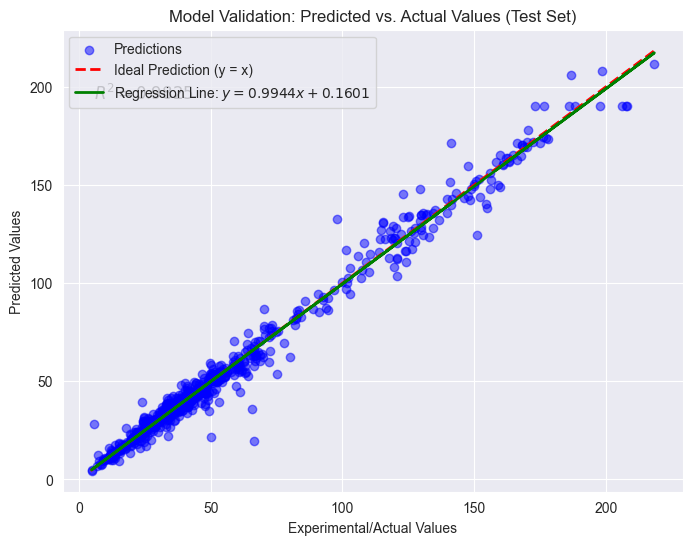

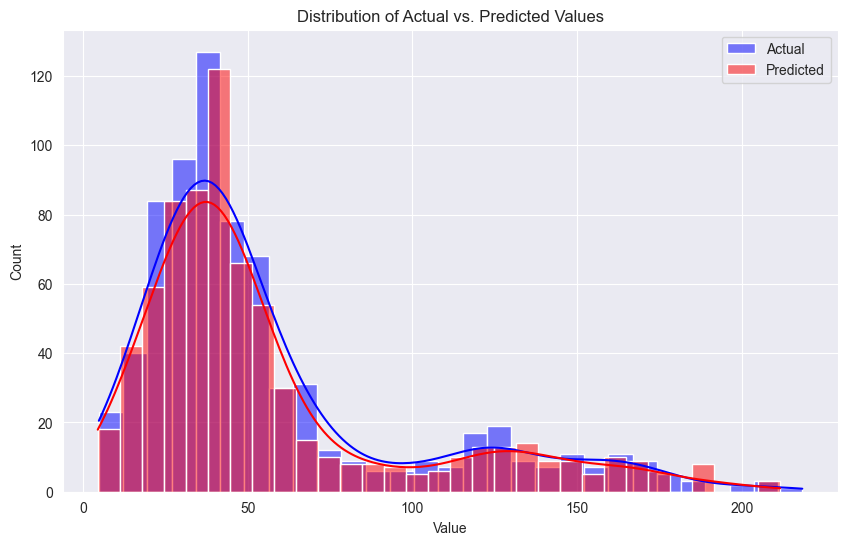

In [10]:
# Import necessary libraries
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt  # Added for plotting
# Distribution Plot (using Seaborn)
import seaborn as sns
from sklearn.model_selection import learning_curve
# Assuming X and Y are your feature and target variables
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the LightGBM model
model = xgb.XGBRegressor()

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the training and test sets
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Calculate the metrics for the test set
r2_test = r2_score(Y_test, Y_pred_test)
mae_test = mean_absolute_error(Y_test, Y_pred_test)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
mape_test = mean_absolute_percentage_error(Y_test, Y_pred_test)
accuracy_test = 100 - mape_test * 100 

# Evaluate the model on the training set
print("Training Set Metrics:")
print(f"R2 score: {r2_score(Y_train, Y_pred_train):.4f}")
print(f"MAE: {mean_absolute_error(Y_train, Y_pred_train):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_train, Y_pred_train)):.4f}")

# Evaluate the model on the test set
print("\nTest Set Metrics:")
print(f"R2 score: {r2_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"Accuracy: {accuracy_test:.2f}%")


plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_test, alpha=0.5, label='Predictions', color='blue')

# Plot the perfect prediction line (y = x)
max_val = max(Y_test.max(), Y_pred_test.max())
min_val = min(Y_test.min(), Y_pred_test.min())
plt.plot([min_val, max_val], [min_val, max_val], '--', lw=2, color='red', label='Ideal Prediction (y = x)')

# Add regression line for predictions
coefficients = np.polyfit(Y_test, Y_pred_test, 1)
regression_line = np.polyval(coefficients, Y_test)
plt.plot(Y_test, regression_line, color='green', lw=2, 
         label=f'Regression Line: $y = {coefficients[0]:.4f}x + {coefficients[1]:.4f}$')

# Add R² value to the plot
plt.text(0.05, 0.85, f'$R^2 = {r2_test:.4f}$', transform=plt.gca().transAxes, fontsize=12)

# Labels and title
plt.xlabel('Experimental/Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Validation: Predicted vs. Actual Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()



plt.figure(figsize=(10, 6))
sns.histplot(Y_test, color='blue', label='Actual', kde=True, alpha=0.5)
sns.histplot(Y_pred_test, color='red', label='Predicted', kde=True, alpha=0.5)
plt.xlabel('Value')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()
plt.show()





## Using FireFly algorithm

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

# Define target and feature columns
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Objective function to minimize (Test RMSE)
def objective(params, algorithm='lgbm'):
    # Create model based on algorithm and parameters
    if algorithm == 'lgbm':
        n_estimators, max_depth, learning_rate = params
        model = LGBMRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
        )
    elif algorithm == 'rf':
        n_estimators, max_depth = params
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            random_state=42,
        )
    elif algorithm == 'xgb':
        n_estimators, max_depth, learning_rate = params
        model = XGBRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
            verbosity=0
        )
    elif algorithm == 'catboost':
        n_estimators, learning_rate = params
        model = CatBoostRegressor(
            iterations=int(n_estimators),
            learning_rate=learning_rate,
            verbose=0,
            random_state=42,
        )
    elif algorithm == 'svr':
        c, epsilon = params
        model = SVR(C=c, epsilon=epsilon)
    else:
        raise ValueError("Unsupported algorithm")
    
    # Fit the model on training data
    model.fit(X_train, Y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    return rmse

# Firefly Algorithm for hyperparameter optimization
def firefly_algorithm(objective_func, lb, ub, num_fireflies=20, max_iter=15, alpha=0.5, beta0=1, gamma=1):
    num_params = len(lb)
    # Initialize fireflies randomly within bounds
    fireflies = np.random.uniform(low=lb, high=ub, size=(num_fireflies, num_params))
    fitness = np.array([objective_func(f) for f in fireflies])
    
    for iteration in range(max_iter):
        for i in range(num_fireflies):
            for j in range(num_fireflies):
                if fitness[j] < fitness[i]:  # Move firefly i towards j if j is brighter (i.e., lower RMSE)
                    distance = np.linalg.norm(fireflies[i] - fireflies[j])
                    beta = beta0 * np.exp(-gamma * distance ** 2)
                    fireflies[i] = fireflies[i] + beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(num_params) - 0.5)
                    # Ensure firefly remains within bounds
                    fireflies[i] = np.clip(fireflies[i], lb, ub)
                    fitness[i] = objective_func(fireflies[i])
                    
        # Reduce randomness over iterations
        alpha *= 0.9
        print(f"Iteration {iteration + 1}/{max_iter}, Best Test RMSE so far: {np.min(fitness):.4f}")
    
    best_index = np.argmin(fitness)
    return fireflies[best_index], fitness[best_index]

# Define bounds for hyperparameters for each algorithm
bounds = {
    'lgbm': ([100, 3, 0.01], [1000, 10, 0.3]),
    'rf': ([100, 3], [1000, 10]),
    'xgb': ([100, 3, 0.01], [1000, 10, 0.3]),
    'catboost': ([100, 0.01], [1000, 0.3]),
    'svr': ([0.1, 0.01], [10, 1]),
}

# Container to hold the results
results = {}

# Optimize hyperparameters for each algorithm using the Firefly Algorithm
for algo in ['lgbm', 'rf', 'xgb', 'catboost', 'svr']:
    lb, ub = bounds[algo]
    print(f"\nOptimizing hyperparameters for {algo.upper()}...")
    best_params, best_rmse = firefly_algorithm(lambda params: objective(params, algorithm=algo), lb, ub)
    results[algo] = {'best_params': best_params, 'best_test_rmse': best_rmse}

# Evaluate and print detailed results for each algorithm
print("\nFinal Model Evaluation:")
for algo, result in results.items():
    best_params = result['best_params']
    test_rmse = result['best_test_rmse']
    print(f"Algorithm: {algo.upper()}")
    print(f"  Best Hyperparameters: {np.round(best_params, 4)}")
    print(f"  Test RMSE:     {test_rmse:.4f}\n")

# Determine the best algorithm based on Test RMSE
best_algo = min(results, key=lambda k: results[k]['best_test_rmse'])
print(f"The best algorithm is {best_algo.upper()} with a Test RMSE of {results[best_algo]['best_test_rmse']:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_test, alpha=0.5, label='Predictions', color='blue')

# Plot the perfect prediction line (y = x)
max_val = max(Y_test.max(), Y_pred_test.max())
min_val = min(Y_test.min(), Y_pred_test.min())
plt.plot([min_val, max_val], [min_val, max_val], '--', lw=2, color='red', label='Ideal Prediction (y = x)')

# Add regression line for predictions
coefficients = np.polyfit(Y_test, Y_pred_test, 1)
regression_line = np.polyval(coefficients, Y_test)
plt.plot(Y_test, regression_line, color='green', lw=2, 
         label=f'Regression Line: $y = {coefficients[0]:.4f}x + {coefficients[1]:.4f}$')

# Add R² value to the plot
plt.text(0.05, 0.85, f'$R^2 = {r2_test:.4f}$', transform=plt.gca().transAxes, fontsize=12)

# Labels and title
plt.xlabel('Experimental/Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Validation: Predicted vs. Actual Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()



plt.figure(figsize=(10, 6))
sns.histplot(Y_test, color='blue', label='Actual', kde=True, alpha=0.5)
sns.histplot(Y_pred_test, color='red', label='Predicted', kde=True, alpha=0.5)
plt.xlabel('Value')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()
plt.show()



Optimizing hyperparameters for LGBM...
Iteration 1/15, Best Test RMSE so far: 4.7163
Iteration 2/15, Best Test RMSE so far: 4.7163
Iteration 3/15, Best Test RMSE so far: 4.7163
Iteration 4/15, Best Test RMSE so far: 4.7163
Iteration 5/15, Best Test RMSE so far: 4.7163
Iteration 6/15, Best Test RMSE so far: 4.7163
Iteration 7/15, Best Test RMSE so far: 4.7163
Iteration 8/15, Best Test RMSE so far: 4.5749
Iteration 9/15, Best Test RMSE so far: 4.5749
Iteration 10/15, Best Test RMSE so far: 4.5749
Iteration 11/15, Best Test RMSE so far: 4.5749
Iteration 12/15, Best Test RMSE so far: 4.5749
Iteration 13/15, Best Test RMSE so far: 4.5749
Iteration 14/15, Best Test RMSE so far: 4.5749
Iteration 15/15, Best Test RMSE so far: 4.5749

Optimizing hyperparameters for RF...
Iteration 1/15, Best Test RMSE so far: 6.2637
Iteration 2/15, Best Test RMSE so far: 6.2637
Iteration 3/15, Best Test RMSE so far: 6.2637
Iteration 4/15, Best Test RMSE so far: 6.2637
Iteration 5/15, Best Test RMSE so far: 5.9

## Using Ant colony

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

# Define target and feature columns
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Objective function to minimize (RMSE)
def objective(params, algorithm='lgbm'):
    if algorithm == 'lgbm':
        n_estimators, max_depth, learning_rate = params
        model = LGBMRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
        )
    elif algorithm == 'rf':
        n_estimators, max_depth = params
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            random_state=42,
        )
    elif algorithm == 'xgb':
        n_estimators, max_depth, learning_rate = params
        model = XGBRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
        )
    elif algorithm == 'catboost':
        n_estimators, learning_rate = params
        model = CatBoostRegressor(
            iterations=int(n_estimators),
            learning_rate=learning_rate,
            verbose=0,
            random_state=42,
        )
    elif algorithm == 'svr':
        c, epsilon = params
        model = SVR(C=c, epsilon=epsilon)

    # Fit the model on the training data
    model.fit(X_train, Y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    return rmse

# Define bounds for hyperparameters for each algorithm
bounds = {
    'lgbm': ([100, 3, 0.01], [1000, 10, 0.3]),
    'rf': ([100, 3], [1000, 10]),
    'xgb': ([100, 3, 0.01], [1000, 10, 0.3]),
    'catboost': ([100, 0.01], [1000, 0.3]),
    'svr': ([0.1, 0.01], [10, 1]),
}

# ACO Implementation
def aco(objective_func, lb, ub, num_ants=20, num_iterations=15):
    num_params = len(lb)
    pheromone = np.ones((num_params,))
    best_solution = None
    best_rmse = float('inf')

    for iteration in range(num_iterations):
        solutions = []
        fitness = []

        for ant in range(num_ants):
            # Generate a solution based on pheromone levels
            solution = [np.random.uniform(lb[i], ub[i]) for i in range(num_params)]
            rmse = objective_func(solution)
            solutions.append(solution)
            fitness.append(rmse)

        # Update pheromone based on fitness (lower RMSE increases pheromone)
        for i in range(num_params):
            pheromone[i] += 1.0 / (1.0 + np.min(fitness))
        
        # Evaporation
        pheromone *= 0.9

        # Find the best solution in this iteration
        min_rmse = np.min(fitness)
        if min_rmse < best_rmse:
            best_rmse = min_rmse
            best_solution = solutions[np.argmin(fitness)]
        
        print(f"Iteration {iteration + 1}/{num_iterations}, Best RMSE: {best_rmse:.4f}")
    
    return best_solution, best_rmse

# Run ACO for each algorithm
results = {}
for algo in ['lgbm', 'rf', 'xgb', 'catboost', 'svr']:
    lb, ub = bounds[algo]
    print(f"\nOptimizing hyperparameters for {algo.upper()}...")
    best_params, best_rmse = aco(lambda params: objective(params, algorithm=algo), lb, ub)
    results[algo] = {'best_params': best_params, 'best_test_rmse': best_rmse}

# Evaluate and print detailed results for each algorithm
print("\nFinal Model Evaluation:")
for algo, result in results.items():
    best_params = result['best_params']
    test_rmse = result['best_test_rmse']
    print(f"Algorithm: {algo.upper()}")
    print(f"  Best Hyperparameters: {np.round(best_params, 4)}")
    print(f"  Test RMSE:     {test_rmse:.4f}\n")

# Determine the best algorithm based on Test RMSE
best_algo = min(results, key=lambda k: results[k]['best_test_rmse'])
print(f"The best algorithm is {best_algo.upper()} with a Test RMSE of {results[best_algo]['best_test_rmse']:.4f}")


Optimizing hyperparameters for LGBM...
Iteration 1/15, Best RMSE: 4.8165
Iteration 2/15, Best RMSE: 4.7874
Iteration 3/15, Best RMSE: 4.7874
Iteration 4/15, Best RMSE: 4.7874
Iteration 5/15, Best RMSE: 4.7874
Iteration 6/15, Best RMSE: 4.7874
Iteration 7/15, Best RMSE: 4.7874
Iteration 8/15, Best RMSE: 4.7501
Iteration 9/15, Best RMSE: 4.7501
Iteration 10/15, Best RMSE: 4.7501
Iteration 11/15, Best RMSE: 4.7501
Iteration 12/15, Best RMSE: 4.7036
Iteration 13/15, Best RMSE: 4.7036
Iteration 14/15, Best RMSE: 4.7036
Iteration 15/15, Best RMSE: 4.7036

Optimizing hyperparameters for RF...
Iteration 1/15, Best RMSE: 6.2613
Iteration 2/15, Best RMSE: 6.2613
Iteration 3/15, Best RMSE: 6.2560
Iteration 4/15, Best RMSE: 6.2560
Iteration 5/15, Best RMSE: 6.2536
Iteration 6/15, Best RMSE: 6.2536
Iteration 7/15, Best RMSE: 6.2536
Iteration 8/15, Best RMSE: 6.2536
Iteration 9/15, Best RMSE: 6.2536
Iteration 10/15, Best RMSE: 6.2536
Iteration 11/15, Best RMSE: 6.2536
Iteration 12/15, Best RMSE: 6.

## using BEE algorithm

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR


# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Objective function to minimize (Test RMSE)
def objective(params, algorithm='lgbm'):
    # Create model based on algorithm and parameters
    if algorithm == 'lgbm':
        n_estimators, max_depth, learning_rate = params
        model = LGBMRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
        )
    elif algorithm == 'rf':
        n_estimators, max_depth = params
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            random_state=42,
        )
    elif algorithm == 'xgb':
        n_estimators, max_depth, learning_rate = params
        model = XGBRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
            verbosity=0
        )
    elif algorithm == 'catboost':
        n_estimators, learning_rate = params
        model = CatBoostRegressor(
            iterations=int(n_estimators),
            learning_rate=learning_rate,
            verbose=0,
            random_state=42,
        )
    elif algorithm == 'svr':
        c, epsilon = params
        model = SVR(C=c, epsilon=epsilon)
    else:
        raise ValueError("Unsupported algorithm")
    
    # Fit the model on training data
    model.fit(X_train, Y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    return rmse

# Bee Algorithm for hyperparameter optimization
def bee_algorithm(objective_func, lb, ub, num_bees=20, max_iter=15, num_best=5, patch_size=0.1, num_recruited=5):
    num_params = len(lb)
    bees = np.random.uniform(low=lb, high=ub, size=(num_bees, num_params))
    fitness = np.array([objective_func(bee) for bee in bees])
    current_patch_size = patch_size

    for iteration in range(max_iter):
        sorted_indices = np.argsort(fitness)
        bees = bees[sorted_indices]
        fitness = fitness[sorted_indices]
        
        new_bees = []
        new_fitness = []
        for i in range(num_best):
            best_bee = bees[i]
            best_bee_fitness = fitness[i]
            for _ in range(num_recruited):
                candidate = best_bee + current_patch_size * np.random.uniform(-1, 1, num_params)
                candidate = np.clip(candidate, lb, ub)
                candidate_fitness = objective_func(candidate)
                if candidate_fitness < best_bee_fitness:
                    best_bee = candidate
                    best_bee_fitness = candidate_fitness
            new_bees.append(best_bee)
            new_fitness.append(best_bee_fitness)
        
        remaining = num_bees - len(new_bees)
        scouts = np.random.uniform(low=lb, high=ub, size=(remaining, num_params))
        scouts_fitness = np.array([objective_func(bee) for bee in scouts])
        
        bees = np.vstack([np.array(new_bees), scouts])
        fitness = np.concatenate([np.array(new_fitness), scouts_fitness])
        
        current_patch_size *= 0.95
        
        print(f"Iteration {iteration + 1}/{max_iter}, Best Test RMSE so far: {np.min(fitness):.4f}")
    
    best_index = np.argmin(fitness)
    return bees[best_index], fitness[best_index]

# Define bounds for hyperparameters for each algorithm
bounds = {
    'lgbm': ([100, 3, 0.01], [1000, 10, 0.3]),
    'rf': ([100, 3], [1000, 10]),
    'xgb': ([100, 3, 0.01], [1000, 10, 0.3]),
    'catboost': ([100, 0.01], [1000, 0.3]),
    'svr': ([0.1, 0.01], [10, 1]),
}

# Container to hold the results
results = {}

# Optimize hyperparameters for each algorithm using the Bee Algorithm
for algo in ['lgbm', 'rf', 'xgb', 'catboost', 'svr']:
    lb, ub = bounds[algo]
    print(f"\nOptimizing hyperparameters for {algo.upper()} using Bee Algorithm...")
    best_params, best_rmse = bee_algorithm(lambda params: objective(params, algorithm=algo), lb, ub)
    results[algo] = {'best_params': best_params, 'best_test_rmse': best_rmse}

# Function to create and evaluate model given best parameters
def evaluate_model(algorithm, params):
    if algorithm == 'lgbm':
        n_estimators, max_depth, learning_rate = params
        model = LGBMRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
        )
    elif algorithm == 'rf':
        n_estimators, max_depth = params
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            random_state=42,
        )
    elif algorithm == 'xgb':
        n_estimators, max_depth, learning_rate = params
        model = XGBRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
            verbosity=0
        )
    elif algorithm == 'catboost':
        n_estimators, learning_rate = params
        model = CatBoostRegressor(
            iterations=int(n_estimators),
            learning_rate=learning_rate,
            verbose=0,
            random_state=42,
        )
    elif algorithm == 'svr':
        c, epsilon = params
        model = SVR(C=c, epsilon=epsilon)
    else:
        raise ValueError("Unsupported algorithm")
    
    # Fit the model on the training data
    model.fit(X_train, Y_train)
    
    # Predict on both training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))
    
    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)
    
    return train_rmse, test_rmse, train_r2, test_r2

# Evaluate and print detailed results for each algorithm
print("\nFinal Model Evaluation:")
for algo, result in results.items():
    best_params = result['best_params']
    test_rmse = result['best_test_rmse']
    train_rmse, test_rmse_eval, train_r2, test_r2 = evaluate_model(algo, best_params)
    print(f"Algorithm: {algo.upper()}")
    print(f"  Best Hyperparameters: {np.round(best_params, 4)}")
    print(f"  Training RMSE: {train_rmse:.4f}")
    print(f"  Test RMSE:     {test_rmse_eval:.4f}")
    print(f"  Training R² Score (Accuracy): {train_r2:.4f}")
    print(f"  Test R² Score (Accuracy):     {test_r2:.4f}\n")
    results[algo].update({'train_rmse': train_rmse, 'test_rmse': test_rmse_eval, 
                            'train_r2': train_r2, 'test_r2': test_r2})

# Determine the best algorithm based on Test RMSE
best_algo = min(results, key=lambda k: results[k]['test_rmse'])
print(f"The best algorithm is {best_algo.upper()} with a Test RMSE of {results[best_algo]['test_rmse']:.4f}")



Optimizing hyperparameters for LGBM using Bee Algorithm...
Iteration 1/15, Best Test RMSE so far: 5.1771
Iteration 2/15, Best Test RMSE so far: 5.1100
Iteration 3/15, Best Test RMSE so far: 5.0333
Iteration 4/15, Best Test RMSE so far: 5.0333
Iteration 5/15, Best Test RMSE so far: 5.0333
Iteration 6/15, Best Test RMSE so far: 5.0209
Iteration 7/15, Best Test RMSE so far: 5.0209
Iteration 8/15, Best Test RMSE so far: 5.0209
Iteration 9/15, Best Test RMSE so far: 4.8943
Iteration 10/15, Best Test RMSE so far: 4.8943
Iteration 11/15, Best Test RMSE so far: 4.8943
Iteration 12/15, Best Test RMSE so far: 4.8943
Iteration 13/15, Best Test RMSE so far: 4.8943
Iteration 14/15, Best Test RMSE so far: 4.8943
Iteration 15/15, Best Test RMSE so far: 4.8943

Optimizing hyperparameters for RF using Bee Algorithm...
Iteration 1/15, Best Test RMSE so far: 6.4488
Iteration 2/15, Best Test RMSE so far: 6.4488
Iteration 3/15, Best Test RMSE so far: 6.4488
Iteration 4/15, Best Test RMSE so far: 6.4488
It

## Using PSO

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

# Assuming X and Y are predefined feature matrix and target vector
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

def objective(params, algorithm='lgbm'):
    if algorithm == 'lgbm':
        n_estimators, max_depth, learning_rate = params
        model = LGBMRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
        )
    elif algorithm == 'rf':
        n_estimators, max_depth = params
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            random_state=42,
        )
    elif algorithm == 'xgb':
        n_estimators, max_depth, learning_rate = params
        model = XGBRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
            verbosity=0
        )
    elif algorithm == 'catboost':
        n_estimators, learning_rate = params
        model = CatBoostRegressor(
            iterations=int(n_estimators),
            learning_rate=learning_rate,
            verbose=0,
            random_state=42,
        )
    elif algorithm == 'svr':
        c, epsilon = params
        model = SVR(C=c, epsilon=epsilon)
    else:
        raise ValueError("Unsupported algorithm")
    
    # Fit the model on the training data
    model.fit(X_train, Y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    return rmse

# Define bounds for hyperparameters for each algorithm
bounds = {
    'lgbm': ([100, 3, 0.01], [1000, 10, 0.3]),
    'rf': ([100, 3], [1000, 10]),
    'xgb': ([100, 3, 0.01], [1000, 10, 0.3]),
    'catboost': ([100, 0.01], [1000, 0.3]),  # iterations and learning_rate
    'svr': ([0.1, 0.01], [10, 1]),           # C and epsilon
}

# Container to hold the results
results = {}

# Run PSO for each algorithm (assuming pso function is defined)
for algo in ['lgbm', 'rf', 'xgb', 'catboost', 'svr']:
    lb, ub = bounds[algo]
    print(f"\nOptimizing hyperparameters for {algo.upper()} using PSO...")
    # Assuming pso is a predefined function for Particle Swarm Optimization
    best_params, best_rmse = pso(lambda params: objective(params, algorithm=algo), lb, ub, swarmsize=10, maxiter=20)
    results[algo] = {'best_params': best_params, 'best_test_rmse': best_rmse}

# Function to create, train, and evaluate model given best parameters
def evaluate_model(algorithm, params):
    if algorithm == 'lgbm':
        n_estimators, max_depth, learning_rate = params
        model = LGBMRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
        )
    elif algorithm == 'rf':
        n_estimators, max_depth = params
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            random_state=42,
        )
    elif algorithm == 'xgb':
        n_estimators, max_depth, learning_rate = params
        model = XGBRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            random_state=42,
            verbosity=0
        )
    elif algorithm == 'catboost':
        n_estimators, learning_rate = params
        model = CatBoostRegressor(
            iterations=int(n_estimators),
            learning_rate=learning_rate,
            verbose=0,
            random_state=42,
        )
    elif algorithm == 'svr':
        c, epsilon = params
        model = SVR(C=c, epsilon=epsilon)
    else:
        raise ValueError("Unsupported algorithm")
    
    # Fit the model on the training data
    model.fit(X_train, Y_train)
    
    # Predict on both training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))
    
    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)
    
    return train_rmse, test_rmse, train_r2, test_r2

# Final Model Evaluation Output Format
print("\nFinal Model Evaluation:")
for algo, result in results.items():
    best_params = result['best_params']
    # Evaluate the model using the best parameters found by PSO
    train_rmse, test_rmse_eval, train_r2, test_r2 = evaluate_model(algo, best_params)
    print(f"Algorithm: {algo.upper()}")
    print(f"  Best Hyperparameters: {np.round(best_params, 4)}")
    print(f"  Training RMSE: {train_rmse:.4f}")
    print(f"  Test RMSE:     {test_rmse_eval:.4f}")
    print(f"  Training R² Score: {train_r2:.4f}")
    print(f"  Test R² Score:     {test_r2:.4f}\n")
    # Update results dictionary
    results[algo].update({
        'train_rmse': train_rmse, 
        'test_rmse': test_rmse_eval, 
        'train_r2': train_r2, 
        'test_r2': test_r2
    })

# Determine the best algorithm based on Test RMSE
best_algo = min(results, key=lambda k: results[k]['test_rmse'])
print(f"The best algorithm is {best_algo.upper()} with a Test RMSE of {results[best_algo]['test_rmse']:.4f}")


Optimizing hyperparameters for LGBM using PSO...
Stopping search: maximum iterations reached --> 20

Optimizing hyperparameters for RF using PSO...
Stopping search: maximum iterations reached --> 20

Optimizing hyperparameters for XGB using PSO...
Stopping search: maximum iterations reached --> 20

Optimizing hyperparameters for CATBOOST using PSO...
Stopping search: maximum iterations reached --> 20

Optimizing hyperparameters for SVR using PSO...
Stopping search: maximum iterations reached --> 20

Final Model Evaluation:
Algorithm: LGBM
  Best Hyperparameters: [8.606211e+02 7.979300e+00 1.780000e-01]
  Training RMSE: 2.1243
  Test RMSE:     4.9394
  Training R² Score: 0.9974
  Test R² Score:     0.9866

Algorithm: RF
  Best Hyperparameters: [618.7499  10.    ]
  Training RMSE: 4.2644
  Test RMSE:     6.4359
  Training R² Score: 0.9895
  Test R² Score:     0.9772

Algorithm: XGB
  Best Hyperparameters: [2.661704e+02 8.405000e+00 1.384000e-01]
  Training RMSE: 1.7915
  Test RMSE:     

## Using BBO Algorithm

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

# Assuming X and Y are defined
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Objective function to minimize (RMSE)
def objective(params, algorithm='lgbm'):
    if algorithm == 'svr':
        C, epsilon = params
        model = SVR(C=C, epsilon=epsilon)
    else:
        n_estimators = int(params[0])
        max_depth = int(params[1])
        learning_rate = params[2] if algorithm in ['lgbm', 'xgb', 'catboost', 'gbr'] else None

        if algorithm == 'lgbm':
            model = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
        elif algorithm == 'rf':
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        elif algorithm == 'xgb':
            model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
        elif algorithm == 'catboost':
            model = CatBoostRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, verbose=0, random_state=42)
        elif algorithm == 'gbr':
            model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    return rmse

# Define bounds for hyperparameters for each algorithm
bounds = {
    'lgbm': ([100, 3, 0.01], [1000, 10, 0.3]),
    'rf': ([100, 3], [1000, 10]),
    'xgb': ([100, 3, 0.01], [1000, 10, 0.3]),
    'catboost': ([100, 3, 0.01], [1000, 10, 0.3]),
    'gbr': ([100, 3, 0.01], [1000, 10, 0.3]),
    'svr': ([0.1, 0.01], [100, 1.0])  # C: [0.1, 100], epsilon: [0.01, 1.0]
}

# BBO Algorithm parameters
num_generations = 15
population_size = 20

results = {}
for algo in bounds.keys():
    lb, ub = bounds[algo]
    num_params = len(lb)
    population = np.random.uniform(low=lb, high=ub, size=(population_size, num_params))
    best_solution = None
    best_rmse = float('inf')

    for generation in range(num_generations):
        fitness = np.array([objective(ind, algorithm=algo) for ind in population])

        min_rmse = np.min(fitness)
        if min_rmse < best_rmse:
            best_rmse = min_rmse
            best_solution = population[np.argmin(fitness)]

        for i in range(population_size):
            if np.random.rand() < 0.5:
                donor = population[np.random.randint(0, population_size)]
                population[i] = np.clip(population[i] + np.random.rand() * (donor - population[i]), lb, ub)

        mutation_rate = 0.1
        for i in range(population_size):
            if np.random.rand() < mutation_rate:
                population[i] = np.clip(population[i] + np.random.normal(0, 0.1, size=num_params), lb, ub)

        print(f"{algo.upper()} - Generation {generation + 1}/{num_generations}, Best RMSE: {best_rmse:.4f}")

    results[algo] = {'best_params': best_solution, 'best_rmse': best_rmse}

# Define the evaluate_model function to get training and test metrics
def evaluate_model(algorithm, params):
    if algorithm == 'svr':
        C, epsilon = params
        model = SVR(C=C, epsilon=epsilon)
    else:
        n_estimators = int(params[0])
        max_depth = int(params[1])
        learning_rate = params[2] if algorithm in ['lgbm', 'xgb', 'catboost', 'gbr'] else None

        if algorithm == 'lgbm':
            model = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
        elif algorithm == 'rf':
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        elif algorithm == 'xgb':
            model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
        elif algorithm == 'catboost':
            model = CatBoostRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, verbose=0, random_state=42)
        elif algorithm == 'gbr':
            model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)

    # Fit the model on training data
    model.fit(X_train, Y_train)

    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))
    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)

    return train_rmse, test_rmse, train_r2, test_r2

# Final Model Evaluation Output Format
print("\nFinal Model Evaluation:")
for algo, result in results.items():
    best_params = result['best_params']
    train_rmse, test_rmse_eval, train_r2, test_r2 = evaluate_model(algo, best_params)
    print(f"Algorithm: {algo.upper()}")
    print(f"  Best Hyperparameters: {np.round(best_params, 4)}")
    print(f"  Training RMSE: {train_rmse:.4f}")
    print(f"  Test RMSE:     {test_rmse_eval:.4f}")
    print(f"  Training R² Score: {train_r2:.4f}")
    print(f"  Test R² Score:     {test_r2:.4f}\n")
    results[algo].update({
        'train_rmse': train_rmse, 
        'test_rmse': test_rmse_eval, 
        'train_r2': train_r2, 
        'test_r2': test_r2
    })

# Determine the best algorithm based on Test RMSE
best_algo = min(results, key=lambda k: results[k]['test_rmse'])
print(f"The best algorithm is {best_algo.upper()} with a Test RMSE of {results[best_algo]['test_rmse']:.4f}")


LGBM - Generation 1/15, Best RMSE: 5.1202
LGBM - Generation 2/15, Best RMSE: 5.1202
LGBM - Generation 3/15, Best RMSE: 5.1202
LGBM - Generation 4/15, Best RMSE: 5.1202
LGBM - Generation 5/15, Best RMSE: 5.1202
LGBM - Generation 6/15, Best RMSE: 5.1202
LGBM - Generation 7/15, Best RMSE: 5.1202
LGBM - Generation 8/15, Best RMSE: 5.1202
LGBM - Generation 9/15, Best RMSE: 5.1202
LGBM - Generation 10/15, Best RMSE: 5.1202
LGBM - Generation 11/15, Best RMSE: 5.1202
LGBM - Generation 12/15, Best RMSE: 5.1202
LGBM - Generation 13/15, Best RMSE: 5.1202
LGBM - Generation 14/15, Best RMSE: 5.1202
LGBM - Generation 15/15, Best RMSE: 5.1202
RF - Generation 1/15, Best RMSE: 6.7396
RF - Generation 2/15, Best RMSE: 6.7396
RF - Generation 3/15, Best RMSE: 6.7396
RF - Generation 4/15, Best RMSE: 6.7396
RF - Generation 5/15, Best RMSE: 6.7396
RF - Generation 6/15, Best RMSE: 6.7396
RF - Generation 7/15, Best RMSE: 6.7396
RF - Generation 8/15, Best RMSE: 6.7396
RF - Generation 9/15, Best RMSE: 6.7396
RF -

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

# Assuming X and Y are defined
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Objective function to minimize (RMSE)
def objective(params, algorithm='lgbm'):
    if algorithm == 'svr':
        C, epsilon = params
        model = SVR(C=C, epsilon=epsilon)
    else:
        n_estimators = int(params[0])
        max_depth = int(params[1])
        learning_rate = params[2] if algorithm in ['lgbm', 'xgb', 'catboost', 'gbr'] else None

        if algorithm == 'lgbm':
            model = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                  learning_rate=learning_rate, random_state=42)
        elif algorithm == 'rf':
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                          random_state=42)
        elif algorithm == 'xgb':
            model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                 learning_rate=learning_rate, random_state=42)
        elif algorithm == 'catboost':
            model = CatBoostRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                      learning_rate=learning_rate, verbose=0, random_state=42)
        elif algorithm == 'gbr':
            model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                              learning_rate=learning_rate, random_state=42)

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    return rmse

# Define bounds for hyperparameters for each algorithm
bounds = {
    'lgbm': ([100, 3, 0.01], [1000, 10, 0.3]),
    'rf': ([100, 3], [1000, 10]),
    'xgb': ([100, 3, 0.01], [1000, 10, 0.3]),
    'catboost': ([100, 3, 0.01], [1000, 10, 0.3]),
    'gbr': ([100, 3, 0.01], [1000, 10, 0.3]),
    'svr': ([0.1, 0.01], [100, 1.0])  # C: [0.1, 100], epsilon: [0.01, 1.0]
}

# --- Genetic Algorithm Implementation ---
def genetic_algorithm(objective_func, lb, ub, algorithm, pop_size=20, generations=15, 
                      mutation_rate=0.1, crossover_rate=0.8):
    num_params = len(lb)
    # Initialize population
    population = np.random.uniform(low=lb, high=ub, size=(pop_size, num_params))
    best_solution = None
    best_fitness = float('inf')
    
    # Tournament selection helper function
    def tournament_selection(pop, fit, k=3):
        # Randomly choose k individuals and select the best among them
        indices = np.random.choice(len(pop), k, replace=False)
        best_idx = indices[0]
        for idx in indices:
            if fit[idx] < fit[best_idx]:
                best_idx = idx
        return pop[best_idx]
    
    for generation in range(generations):
        fitness = np.array([objective_func(ind, algorithm=algorithm) for ind in population])
        
        # Update best solution found so far
        current_best_idx = np.argmin(fitness)
        if fitness[current_best_idx] < best_fitness:
            best_fitness = fitness[current_best_idx]
            best_solution = population[current_best_idx].copy()
        
        new_population = []
        
        # Create new population using selection, crossover, and mutation
        while len(new_population) < pop_size:
            # Selection (Tournament)
            parent1 = tournament_selection(population, fitness, k=3)
            parent2 = tournament_selection(population, fitness, k=3)
            
            # Crossover (Single-point)
            if np.random.rand() < crossover_rate:
                crossover_point = np.random.randint(1, num_params)
                child1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
                child2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
            else:
                child1, child2 = parent1.copy(), parent2.copy()
            
            # Mutation
            if np.random.rand() < mutation_rate:
                child1 += np.random.normal(0, 0.1, size=num_params)
            if np.random.rand() < mutation_rate:
                child2 += np.random.normal(0, 0.1, size=num_params)
            
            # Clip the children to bounds
            child1 = np.clip(child1, lb, ub)
            child2 = np.clip(child2, lb, ub)
            
            new_population.append(child1)
            if len(new_population) < pop_size:
                new_population.append(child2)
        
        population = np.array(new_population)
        print(f"{algorithm.upper()} - Generation {generation + 1}/{generations}, Best RMSE: {best_fitness:.4f}")
    
    return best_solution, best_fitness

# Container for GA results for each algorithm
results = {}

for algo in bounds.keys():
    lb, ub = bounds[algo]
    best_params, best_rmse = genetic_algorithm(objective, lb, ub, algorithm=algo,
                                                 pop_size=20, generations=15,
                                                 mutation_rate=0.1, crossover_rate=0.8)
    results[algo] = {'best_params': best_params, 'best_rmse': best_rmse}

# Define the evaluate_model function to get training and test metrics
def evaluate_model(algorithm, params):
    if algorithm == 'svr':
        C, epsilon = params
        model = SVR(C=C, epsilon=epsilon)
    else:
        n_estimators = int(params[0])
        max_depth = int(params[1])
        learning_rate = params[2] if algorithm in ['lgbm', 'xgb', 'catboost', 'gbr'] else None

        if algorithm == 'lgbm':
            model = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                  learning_rate=learning_rate, random_state=42)
        elif algorithm == 'rf':
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                          random_state=42)
        elif algorithm == 'xgb':
            model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                 learning_rate=learning_rate, random_state=42)
        elif algorithm == 'catboost':
            model = CatBoostRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                      learning_rate=learning_rate, verbose=0, random_state=42)
        elif algorithm == 'gbr':
            model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                              learning_rate=learning_rate, random_state=42)

    # Fit the model on training data
    model.fit(X_train, Y_train)

    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))
    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)

    return train_rmse, test_rmse, train_r2, test_r2

# Final Model Evaluation Output Format
print("\nFinal Model Evaluation:")
for algo, result in results.items():
    best_params = result['best_params']
    train_rmse, test_rmse_eval, train_r2, test_r2 = evaluate_model(algo, best_params)
    print(f"Algorithm: {algo.upper()}")
    print(f"  Best Hyperparameters: {np.round(best_params, 4)}")
    print(f"  Training RMSE: {train_rmse:.4f}")
    print(f"  Test RMSE:     {test_rmse_eval:.4f}")
    print(f"  Training R² Score: {train_r2:.4f}")
    print(f"  Test R² Score:     {test_r2:.4f}\n")
    results[algo].update({
        'train_rmse': train_rmse, 
        'test_rmse': test_rmse_eval, 
        'train_r2': train_r2, 
        'test_r2': test_r2
    })

# Determine the best algorithm based on Test RMSE
best_algo = min(results, key=lambda k: results[k]['test_rmse'])
print(f"The best algorithm is {best_algo.upper()} with a Test RMSE of {results[best_algo]['test_rmse']:.4f}")


LGBM - Generation 1/15, Best RMSE: 5.2081
LGBM - Generation 2/15, Best RMSE: 5.1742
LGBM - Generation 3/15, Best RMSE: 5.1455
LGBM - Generation 4/15, Best RMSE: 5.1447
LGBM - Generation 5/15, Best RMSE: 5.1447
LGBM - Generation 6/15, Best RMSE: 5.1438
LGBM - Generation 7/15, Best RMSE: 5.1438
LGBM - Generation 8/15, Best RMSE: 5.1023
LGBM - Generation 9/15, Best RMSE: 5.1023
LGBM - Generation 10/15, Best RMSE: 5.1023
LGBM - Generation 11/15, Best RMSE: 5.1023
LGBM - Generation 12/15, Best RMSE: 5.1023
LGBM - Generation 13/15, Best RMSE: 5.1023
LGBM - Generation 14/15, Best RMSE: 5.1023
LGBM - Generation 15/15, Best RMSE: 5.1023
RF - Generation 1/15, Best RMSE: 6.7539
RF - Generation 2/15, Best RMSE: 6.7353
RF - Generation 3/15, Best RMSE: 6.7353
RF - Generation 4/15, Best RMSE: 6.7353
RF - Generation 5/15, Best RMSE: 6.7353
RF - Generation 6/15, Best RMSE: 6.7353
RF - Generation 7/15, Best RMSE: 6.4483
RF - Generation 8/15, Best RMSE: 6.4483
RF - Generation 9/15, Best RMSE: 6.4483
RF -

## using Gray Wolf Optimizer (GWO)

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

# Assuming X and Y are defined
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Objective function to minimize (RMSE)
def objective(params, algorithm='lgbm'):
    if algorithm == 'svr':
        C, epsilon = params
        model = SVR(C=C, epsilon=epsilon)
    else:
        n_estimators = int(params[0])
        max_depth = int(params[1])
        learning_rate = params[2] if algorithm in ['lgbm', 'xgb', 'catboost', 'gbr'] else None

        if algorithm == 'lgbm':
            model = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                  learning_rate=learning_rate, random_state=42)
        elif algorithm == 'rf':
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                          random_state=42)
        elif algorithm == 'xgb':
            model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                 learning_rate=learning_rate, random_state=42)
        elif algorithm == 'catboost':
            model = CatBoostRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                      learning_rate=learning_rate, verbose=0, random_state=42)
        elif algorithm == 'gbr':
            model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                              learning_rate=learning_rate, random_state=42)

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    return rmse

# Define bounds for hyperparameters for each algorithm
bounds = {
    'lgbm': ([100, 3, 0.01], [1000, 10, 0.3]),
    'rf': ([100, 3], [1000, 10]),
    'xgb': ([100, 3, 0.01], [1000, 10, 0.3]),
    'catboost': ([100, 3, 0.01], [1000, 10, 0.3]),
    'gbr': ([100, 3, 0.01], [1000, 10, 0.3]),
    'svr': ([0.1, 0.01], [100, 1.0])  # C: [0.1, 100], epsilon: [0.01, 1.0]
}

# --- Gray Wolf Optimizer (GWO) Implementation ---
def gray_wolf_optimizer(objective_func, lb, ub, algorithm, num_wolves=20, max_iter=15):
    """
    GWO inspired algorithm.
    """
    num_params = len(lb)
    # Initialize positions of wolves randomly within the bounds
    positions = np.random.uniform(low=lb, high=ub, size=(num_wolves, num_params))
    
    # Initialize alpha, beta, delta (best, second best, third best)
    alpha_pos = np.zeros(num_params)
    alpha_score = float('inf')
    
    beta_pos = np.zeros(num_params)
    beta_score = float('inf')
    
    delta_pos = np.zeros(num_params)
    delta_score = float('inf')
    
    # Main loop of GWO
    for iter in range(max_iter):
        # Evaluate fitness of each wolf
        for i in range(num_wolves):
            fitness = objective_func(positions[i], algorithm=algorithm)
            
            # Update alpha, beta, and delta
            if fitness < alpha_score:
                delta_score = beta_score
                delta_pos = beta_pos.copy()
                beta_score = alpha_score
                beta_pos = alpha_pos.copy()
                alpha_score = fitness
                alpha_pos = positions[i].copy()
            elif fitness < beta_score:
                delta_score = beta_score
                delta_pos = beta_pos.copy()
                beta_score = fitness
                beta_pos = positions[i].copy()
            elif fitness < delta_score:
                delta_score = fitness
                delta_pos = positions[i].copy()
        
        # Parameter a decreases linearly from 2 to 0
        a = 2 - iter * (2 / max_iter)
        
        # Update the position of each wolf
        for i in range(num_wolves):
            for j in range(num_params):
                r1 = np.random.rand()
                r2 = np.random.rand()
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = abs(C1 * alpha_pos[j] - positions[i][j])
                X1 = alpha_pos[j] - A1 * D_alpha

                r1 = np.random.rand()
                r2 = np.random.rand()
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_beta = abs(C2 * beta_pos[j] - positions[i][j])
                X2 = beta_pos[j] - A2 * D_beta

                r1 = np.random.rand()
                r2 = np.random.rand()
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_delta = abs(C3 * delta_pos[j] - positions[i][j])
                X3 = delta_pos[j] - A3 * D_delta

                positions[i][j] = np.clip((X1 + X2 + X3) / 3, lb[j], ub[j])
                
        print(f"{algorithm.upper()} - Iteration {iter + 1}/{max_iter}, Best RMSE: {alpha_score:.4f}")
    
    return alpha_pos, alpha_score

# Container for GWO results for each algorithm
results = {}

for algo in bounds.keys():
    lb, ub = bounds[algo]
    best_params, best_rmse = gray_wolf_optimizer(objective, lb, ub, algorithm=algo,
                                                  num_wolves=20, max_iter=15)
    results[algo] = {'best_params': best_params, 'best_rmse': best_rmse}

# Define the evaluate_model function to get training and test metrics
def evaluate_model(algorithm, params):
    if algorithm == 'svr':
        C, epsilon = params
        model = SVR(C=C, epsilon=epsilon)
    else:
        n_estimators = int(params[0])
        max_depth = int(params[1])
        learning_rate = params[2] if algorithm in ['lgbm', 'xgb', 'catboost', 'gbr'] else None

        if algorithm == 'lgbm':
            model = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                  learning_rate=learning_rate, random_state=42)
        elif algorithm == 'rf':
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                          random_state=42)
        elif algorithm == 'xgb':
            model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                 learning_rate=learning_rate, random_state=42)
        elif algorithm == 'catboost':
            model = CatBoostRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                      learning_rate=learning_rate, verbose=0, random_state=42)
        elif algorithm == 'gbr':
            model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                              learning_rate=learning_rate, random_state=42)

    # Fit the model on training data
    model.fit(X_train, Y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))
    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)
    
    return train_rmse, test_rmse, train_r2, test_r2

# Final Model Evaluation Output Format
print("\nFinal Model Evaluation:")
for algo, result in results.items():
    best_params = result['best_params']
    train_rmse, test_rmse_eval, train_r2, test_r2 = evaluate_model(algo, best_params)
    print(f"Algorithm: {algo.upper()}")
    print(f"  Best Hyperparameters: {np.round(best_params, 4)}")
    print(f"  Training RMSE: {train_rmse:.4f}")
    print(f"  Test RMSE:     {test_rmse_eval:.4f}")
    print(f"  Training R² Score: {train_r2:.4f}")
    print(f"  Test R² Score:     {test_r2:.4f}\n")
    results[algo].update({
        'train_rmse': train_rmse, 
        'test_rmse': test_rmse_eval, 
        'train_r2': train_r2, 
        'test_r2': test_r2
    })

# Determine the best algorithm based on Test RMSE
best_algo = min(results, key=lambda k: results[k]['test_rmse'])
print(f"The best algorithm is {best_algo.upper()} with a Test RMSE of {results[best_algo]['test_rmse']:.4f}")


LGBM - Iteration 1/15, Best RMSE: 5.1721
LGBM - Iteration 2/15, Best RMSE: 5.0874
LGBM - Iteration 3/15, Best RMSE: 5.0874
LGBM - Iteration 4/15, Best RMSE: 5.0868
LGBM - Iteration 5/15, Best RMSE: 5.0868
LGBM - Iteration 6/15, Best RMSE: 5.0868
LGBM - Iteration 7/15, Best RMSE: 5.0868
LGBM - Iteration 8/15, Best RMSE: 5.0868
LGBM - Iteration 9/15, Best RMSE: 5.0808
LGBM - Iteration 10/15, Best RMSE: 5.0808
LGBM - Iteration 11/15, Best RMSE: 5.0808
LGBM - Iteration 12/15, Best RMSE: 5.0290
LGBM - Iteration 13/15, Best RMSE: 5.0290
LGBM - Iteration 14/15, Best RMSE: 5.0070
LGBM - Iteration 15/15, Best RMSE: 5.0070
RF - Iteration 1/15, Best RMSE: 7.1255
RF - Iteration 2/15, Best RMSE: 6.4411
RF - Iteration 3/15, Best RMSE: 6.4411
RF - Iteration 4/15, Best RMSE: 6.4374
RF - Iteration 5/15, Best RMSE: 6.4366
RF - Iteration 6/15, Best RMSE: 6.4366
RF - Iteration 7/15, Best RMSE: 6.4362
RF - Iteration 8/15, Best RMSE: 6.4362
RF - Iteration 9/15, Best RMSE: 6.4362
RF - Iteration 10/15, Best R

## Using Bat Algorithm (BA) 

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

# Assuming X and Y are defined
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Objective function to minimize (RMSE)
def objective(params, algorithm='lgbm'):
    if algorithm == 'svr':
        C, epsilon = params
        model = SVR(C=C, epsilon=epsilon)
    else:
        n_estimators = int(params[0])
        max_depth = int(params[1])
        learning_rate = params[2] if algorithm in ['lgbm', 'xgb', 'catboost', 'gbr'] else None

        if algorithm == 'lgbm':
            model = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                  learning_rate=learning_rate, random_state=42)
        elif algorithm == 'rf':
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                          random_state=42)
        elif algorithm == 'xgb':
            model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                 learning_rate=learning_rate, random_state=42)
        elif algorithm == 'catboost':
            model = CatBoostRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                      learning_rate=learning_rate, verbose=0, random_state=42)
        elif algorithm == 'gbr':
            model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                              learning_rate=learning_rate, random_state=42)

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    return rmse

# Define bounds for hyperparameters for each algorithm
bounds = {
    'lgbm': ([100, 3, 0.01], [1000, 10, 0.3]),
    'rf': ([100, 3], [1000, 10]),
    'xgb': ([100, 3, 0.01], [1000, 10, 0.3]),
    'catboost': ([100, 3, 0.01], [1000, 10, 0.3]),
    'gbr': ([100, 3, 0.01], [1000, 10, 0.3]),
    'svr': ([0.1, 0.01], [100, 1.0])  # C: [0.1, 100], epsilon: [0.01, 1.0]
}

# --- Bat Algorithm (BA) Implementation ---
def bat_algorithm(objective_func, lb, ub, algorithm, num_bats=20, max_iter=15, 
                  f_min=0, f_max=2, alpha=0.9, gamma=0.9):
    """
    A simple Bat Algorithm implementation.
    
    Parameters:
      - objective_func: function to minimize.
      - lb: lower bound (list or array of size num_params).
      - ub: upper bound (list or array of size num_params).
      - algorithm: algorithm name (passed to objective_func).
      - num_bats: number of bats (population size).
      - max_iter: number of iterations.
      - f_min, f_max: frequency range.
      - alpha: loudness update parameter.
      - gamma: pulse rate update parameter.
    
    Returns:
      - best_solution: best hyperparameter set found.
      - best_fitness: best fitness (RMSE) value.
    """
    num_params = len(lb)
    # Initialize positions and velocities
    positions = np.random.uniform(low=lb, high=ub, size=(num_bats, num_params))
    velocities = np.zeros((num_bats, num_params))
    frequencies = np.zeros(num_bats)
    loudness = np.ones(num_bats)    # Typically starts with a high value (here 1)
    pulse_rate = np.zeros(num_bats)   # Typically starts low

    # Evaluate initial fitness
    fitness = np.array([objective_func(pos, algorithm=algorithm) for pos in positions])
    best_idx = np.argmin(fitness)
    best_solution = positions[best_idx].copy()
    best_fitness = fitness[best_idx]

    for t in range(max_iter):
        for i in range(num_bats):
            # Update frequency
            frequencies[i] = f_min + (f_max - f_min) * np.random.rand()
            # Update velocity and position
            velocities[i] = velocities[i] + (positions[i] - best_solution) * frequencies[i]
            new_solution = positions[i] + velocities[i]
            new_solution = np.clip(new_solution, lb, ub)

            # Local search: with a probability, generate a solution around the best solution
            if np.random.rand() > pulse_rate[i]:
                new_solution = best_solution + 0.001 * np.random.randn(num_params)
                new_solution = np.clip(new_solution, lb, ub)

            new_fitness = objective_func(new_solution, algorithm=algorithm)

            # Accept the new solution if it improves fitness and with a certain probability
            if (new_fitness < fitness[i]) and (np.random.rand() < loudness[i]):
                positions[i] = new_solution.copy()
                fitness[i] = new_fitness
                # Update loudness and pulse rate
                loudness[i] = alpha * loudness[i]
                pulse_rate[i] = pulse_rate[i] * (1 - np.exp(-gamma * t))

            # Update the global best solution
            if new_fitness < best_fitness:
                best_solution = new_solution.copy()
                best_fitness = new_fitness

        print(f"{algorithm.upper()} - Iteration {t + 1}/{max_iter}, Best RMSE: {best_fitness:.4f}")
    return best_solution, best_fitness

# Container for BA results for each algorithm
results = {}

for algo in bounds.keys():
    lb, ub = bounds[algo]
    best_params, best_rmse = bat_algorithm(objective, lb, ub, algorithm=algo,
                                           num_bats=20, max_iter=15,
                                           f_min=0, f_max=2, alpha=0.9, gamma=0.9)
    results[algo] = {'best_params': best_params, 'best_rmse': best_rmse}

# Define the evaluate_model function to get training and test metrics
def evaluate_model(algorithm, params):
    if algorithm == 'svr':
        C, epsilon = params
        model = SVR(C=C, epsilon=epsilon)
    else:
        n_estimators = int(params[0])
        max_depth = int(params[1])
        learning_rate = params[2] if algorithm in ['lgbm', 'xgb', 'catboost', 'gbr'] else None

        if algorithm == 'lgbm':
            model = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                  learning_rate=learning_rate, random_state=42)
        elif algorithm == 'rf':
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                          random_state=42)
        elif algorithm == 'xgb':
            model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                 learning_rate=learning_rate, random_state=42)
        elif algorithm == 'catboost':
            model = CatBoostRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                      learning_rate=learning_rate, verbose=0, random_state=42)
        elif algorithm == 'gbr':
            model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                              learning_rate=learning_rate, random_state=42)

    # Fit the model on training data
    model.fit(X_train, Y_train)
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))
    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)

    return train_rmse, test_rmse, train_r2, test_r2

# Final Model Evaluation Output Format
print("\nFinal Model Evaluation:")
for algo, result in results.items():
    best_params = result['best_params']
    train_rmse, test_rmse_eval, train_r2, test_r2 = evaluate_model(algo, best_params)
    print(f"Algorithm: {algo.upper()}")
    print(f"  Best Hyperparameters: {np.round(best_params, 4)}")
    print(f"  Training RMSE: {train_rmse:.4f}")
    print(f"  Test RMSE:     {test_rmse_eval:.4f}")
    print(f"  Training R² Score: {train_r2:.4f}")
    print(f"  Test R² Score:     {test_r2:.4f}\n")
    results[algo].update({
        'train_rmse': train_rmse, 
        'test_rmse': test_rmse_eval, 
        'train_r2': train_r2, 
        'test_r2': test_r2
    })

# Determine the best algorithm based on Test RMSE
best_algo = min(results, key=lambda k: results[k]['test_rmse'])
print(f"The best algorithm is {best_algo.upper()} with a Test RMSE of {results[best_algo]['test_rmse']:.4f}")
                                                                            

LGBM - Iteration 1/15, Best RMSE: 4.9998
LGBM - Iteration 2/15, Best RMSE: 4.9998
LGBM - Iteration 3/15, Best RMSE: 4.9998
LGBM - Iteration 4/15, Best RMSE: 4.9785
LGBM - Iteration 5/15, Best RMSE: 4.9785
LGBM - Iteration 6/15, Best RMSE: 4.9785
LGBM - Iteration 7/15, Best RMSE: 4.9785
LGBM - Iteration 8/15, Best RMSE: 4.9785
LGBM - Iteration 9/15, Best RMSE: 4.9785
LGBM - Iteration 10/15, Best RMSE: 4.9785
LGBM - Iteration 11/15, Best RMSE: 4.9785
LGBM - Iteration 12/15, Best RMSE: 4.9785
LGBM - Iteration 13/15, Best RMSE: 4.9785
LGBM - Iteration 14/15, Best RMSE: 4.9785
LGBM - Iteration 15/15, Best RMSE: 4.9785
RF - Iteration 1/15, Best RMSE: 6.7380
RF - Iteration 2/15, Best RMSE: 6.7380
RF - Iteration 3/15, Best RMSE: 6.7380
RF - Iteration 4/15, Best RMSE: 6.7380
RF - Iteration 5/15, Best RMSE: 6.7380
RF - Iteration 6/15, Best RMSE: 6.7380
RF - Iteration 7/15, Best RMSE: 6.7380
RF - Iteration 8/15, Best RMSE: 6.7380
RF - Iteration 9/15, Best RMSE: 6.7380
RF - Iteration 10/15, Best R